# Statistics in fMRI data

#### Goal : 

The nobel prize winning physicist once aptly stated that "rigor and clarity are not synonymous". Keeping this in mind the intended emphasis of this notebook is clarity. It *is not* our goal to give a rigorous mathematical presentation of various statistical tests and methods that can be used to test connectivity levels between different brain types;however,it *is* our goal to provide clarity on how one could test whether or not there is a "significant difference" (used here in a very colloqiual sense) between the depressed brains and the not depressed brains. That is not to say the former is not important. We strongly reccomend taking a rigorous class in mathematical statisitcs such as Stat 135. However we choose not to delve into the mathematics here because we feel it is first important to understand ,in a very concrete way, *why* taking such a class could be interesting and useful.

#### Abstraction: 

Often times when trying to solve a particular problem with data IRL it is important to be able to abstract away the problem from the particular to the general. Case and point: If we were the first researchers studying links between connectivity of the brain and depression, googling: "How to tell the difference between depressed brains and not depressed brain" would likely not be very helpful. We are on the cutting edge! If google knew the answer to this question then our funding would likely be in jeopardy. However if we were to abstract the problem away from specific, and enter a query such as: "statistical test to determine whether or not 2 different samples were pulled from the same distribution" then ... we would be in buisness. However knowing to enter such a query requires a certain amount of understanding; in particular  knowing to enter such a query requires us to have the ability to **think probabalistically**. 

In short, the main goal of this notebook is to provide a concrete example of how to think probabilistically and computationally to solve a real-world problem. In particular we want to provide the reader with an example of how we can model data with random variables and then draw inferences from that model.

Part of thinking "computationally"(at least in the context of dealing with data) involves the ability to use computers to get an intuition about the structure of the data. A big part of this intuition comes in the form of visualization. Thus we sill start our analysis by visualizing the data.

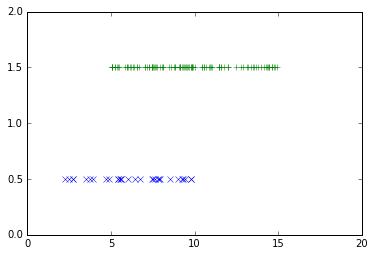

In [38]:
## Visualize data 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

depressed = np.random.uniform(2,10,30)
happy = np.random.uniform(5,15,100)

plt.plot(depressed, len(depressed) * [0.5], "x")
plt.plot(happy, len(happy) * [1.5], "+")
plt.axis([0, 20,0,2])
plt.show()

#### Model:

Visually we are able to tell that there is definitiely a difference between the two groups. However if we want to try and make this difference a bit more precise. This is where knowing how to think probabalistically becomes very important.

Our given data is the conectivity statistics for $n$ brains, which we will denote $B_1, \ldots, B_n$. Wherein there is some set of indeces $D$ corresponding to depressed brains, and some set of indeces $H$ corresponding to not depressed (happy) brains. What we want to test is whether or not the connectivity of the depressed brains and happy brains are drawn from the same distribution i.e. $B_1,\ldots,B_n \sim \mathbb{B}$ or if they are drawn from fundamentally different distributions i.e. $B_i \sim \mathbb{D} \ \ \forall i \in D$ and $B_i \sim \mathbb{H} \ \ \forall i \in H$.

At this point I really want to emphasize that everything shown above is THE MOST IMPORTANT PART OF THIS NOTEBOOK. Because IRL now would be the time to start some frantic googling: http://bfy.tw/DylF to try and figure out a good way to test the differences in brain. If you are able to do what I have described above, namely think probabilistically and computationally you have picked up the main point of this portion of the presentation. That is not to say that the following portion of the notebook is not important. It is just the analysis that follows presents an outline of some of the take home messages, one would have gleamed after a lot of time thinking about the problem. In other words DO NOT FEEL BAD IF YOU ARE NOT ABLE TO FOLLOW THE NEXT SESSION. Especially if you are a biologist since the folowing presents a certain thought process that takes a lot of time to develop -- time that you may not have put in if you haven't taken a lot of more theoretical classes.


![title](imgs/math_ahead.png)

At this point one idea is to try and model the conditional probability that we observe the current variation in brains given they were drawn from different distributions i.e.

$
\mathbb{P}(B_1,\ldots, B_n | B_i \sim \mathbb{D} \ \ \forall i \in D, B_i \sim \mathbb{H} \ \ \forall i \in H )
$

The idea being if this probability is high then we have strong evidence suggesting there is a difference in connectivity levels of depressed and happy brains. However using such a model requires prior knowledge of the distributions $\mathbb{D}$ and $\mathbb{H}$. Knowledge that we do not neccessarily have *a priori*. Keeping this in mind let us consider the second natural approach to try and guage whether or not there is a difference between happy and depressed brains. Namely:

$
\mathbb{P}(B_1,\ldots, B_n | B_i \sim \mathbb{B} \ \ \forall i ).
$

This approach seems to be superior to the previous one in the sense that it only deals with one unknown distribution rather than $2$. Furthermore with this framing of the problem we should be able to rank all of the brains from most connected to least connected -- namely $R(B_1), ...,R(B_i)$ and calculate the probability the rankings appear the way they do assuming $B_i \sim \mathbb{B} \ \ \forall i$. More rigorously we will look at

$
\mathbb{P}(R(B_1),\ldots, R(B_n) | B_i \sim \mathbb{B} \ \ \forall i ).
$

where $R$ is a function that maps the test statistic to its ranking. This seems to have promise since once we look at the rankings we are somehow overcoming the problem of the unknown distribution. However we are not quite there. In particular in it's hard to see how this calculation bears any practical significance given as n grows very large the probablity that the rankings take any specific form tends towards $0$. Thus all the probabilities are low. One response is to consider the rank-sum of all of the depressed brains and calculate what the probability of seeing a rank-sum as extreme or more extreme then the computed rank-sum. More precisely

$
\mathbb{P}(\sum_{i \in D} R(B_i) \ | \ B_i \sim \mathbb{B} \ \ \forall i ).
$

Here we are measuring the probability that a randomly selected subset of size $|D|$ from an original set of size $|B|$ has rank sum as extrme as $sum_{i \in D} R(B_i)$. Indeed, we can calculate the distribution of the rank sum of a subset of size $|D|$ from a superset of size $|S|$ from first principles and calculate $ \mathbb{P}(\sum_{i \in D} R(B_i) \ | \ B_i \sim \mathbb{B} \ \ \forall i )$. This is in fact called the Wilcoxon Rank sum test; and there is code for it in python !

In [13]:
# Wilcoxon rank sum test
# Reference https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.wilcoxon.html
import scipy.stats as stats
test_statistic,p_value= stats.ranksums(depressed,happy)
print("-------------------------------------------------------------------------------------------------------------")
print("The probability we observe a rank sum this extreme given the brains were drawn from the same distribution is:")
print(p_value)
print("-------------------------------------------------------------------------------------------------------------")
print("In other words if the brains were drawn from the same distribution we would expect to see a rank sum this extreme")
print(str(p_value*100) + "% of the time")
print("-------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------
The probability we observe a rank sum this extreme given the brains were drawn from the same distribution is:
0.000143486700025
-------------------------------------------------------------------------------------------------------------
In other words if the brains were drawn from the same distribution we would expect to see a rank sum this extreme
0.0143486700025% of the time
-------------------------------------------------------------------------------------------------------------


### If you are interested here are some additional articles/sources

https://www.scientificamerican.com/article/brain-imaging-identifies-different-types-of-depression/